# Assignment 1 - part 2

In [ ]:
# Ashutosh Chauhan: S20180010017
# Ayush Gairola: S20180010020
# Pradum Singh: S20180010136
# Vipul Rawat: S20180010192

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/MyDrive/Assignment1/assignment1-part2')

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from models.neural_net import NeuralNetwork
from utils.data_process import get_CIFAR10_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Loading CIFAR-10
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the CIFAR-10 dataset.

In [4]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 10000

data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

## Train using SGD
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

You can try different numbers of layers and other hyperparameters on the CIFAR-10 dataset below.

In [24]:
# Hyperparameters
input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 100
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 30
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.95
regularization = 0.1

# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

# Variables to store performance for each epoch
train_loss = []
train_accuracy = []
val_accuracy = []
N = X_train.shape[0]
# For each epoch...
for epoch in range(epochs):
    # print('epoch:', epoch)
    
    # Shuffle the dataset
    
    # Training
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        X_batch = None
        y_batch = None
        batch_indices = np.random.choice(N, batch_size, replace=False)
        X_batch = X_train[batch_indices]
        y_batch = y_train[batch_indices]
        
        # Run the forward pass of the model to get a prediction and compute the accuracy 
        if batch % 245 == 0:
            matrix = net.forward(X_batch)
            y_pred = np.argmax(matrix, axis=1)
            train_acc = np.mean(y_pred == y_batch)
            train_accuracy.append(train_acc)
        # Run the backward pass of the model to update the weights and compute the loss
        loss = net.backward(X_batch, y_batch, learning_rate, regularization)
        train_loss.append(loss)
        if batch % 245 == 0:
            print("Epoch %d, loss %f" % (epoch,loss))
    if epoch%5 == 0:
        learning_rate *= learning_rate_decay
    # Validation
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    
    matrix_val = net.forward(X_val)
    y_pred_val = np.argmax(matrix_val, axis=1)
    val_acc = (y_pred_val == y_val).mean()
    val_accuracy.append(val_acc)
print(train_accuracy)
print(val_accuracy)

Epoch 0, loss 103.472280
Epoch 1, loss 93.525522
Epoch 2, loss 85.296712
Epoch 3, loss 77.989260
Epoch 4, loss 71.127515
Epoch 5, loss 65.180290
Epoch 6, loss 59.514439
Epoch 7, loss 54.726800
Epoch 8, loss 50.325897
Epoch 9, loss 46.252154
Epoch 10, loss 42.706580
Epoch 11, loss 39.286694
Epoch 12, loss 36.280455
Epoch 13, loss 33.604223
Epoch 14, loss 31.152934
Epoch 15, loss 28.903750
Epoch 16, loss 26.744298
Epoch 17, loss 24.944192
Epoch 18, loss 23.184181
Epoch 19, loss 21.698658
Epoch 20, loss 20.312648
Epoch 21, loss 18.934804
Epoch 22, loss 17.731454
Epoch 23, loss 16.706370
Epoch 24, loss 15.768459
Epoch 25, loss 14.806270
Epoch 26, loss 13.895724
Epoch 27, loss 13.185055
Epoch 28, loss 12.526169
Epoch 29, loss 11.756560
[0.105, 0.295, 0.335, 0.33, 0.385, 0.4, 0.415, 0.395, 0.385, 0.435, 0.375, 0.39, 0.41, 0.415, 0.36, 0.355, 0.395, 0.39, 0.445, 0.41, 0.39, 0.425, 0.49, 0.42, 0.36, 0.38, 0.395, 0.355, 0.355, 0.415]
[0.274, 0.319, 0.355, 0.374, 0.39, 0.392, 0.389, 0.398, 0.403

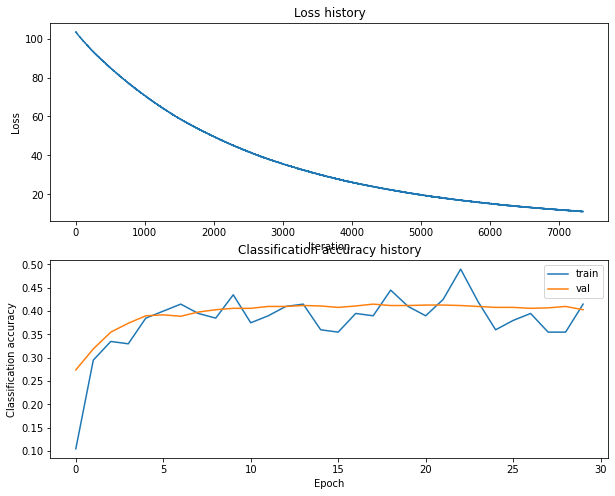

In [25]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy, label='train')
plt.plot(val_accuracy, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

## Train using Adam
Next we will train the same model using the Adam optimizer. You should take the above code for SGD and modify it to use Adam instead. For implementation details, see the lecture slides. The original paper that introduced Adam is also a good reference, and contains suggestions for default values: https://arxiv.org/pdf/1412.6980.pdf

In [26]:
"""Neural network model."""

from typing import Sequence

import numpy as np


class AdamNeuralNetwork:
    """A multi-layer fully-connected neural network. The net has an input
    dimension of N, a hidden layer dimension of H, and performs classification
    over C classes. We train the network with a cross-entropy loss function and
    L2 regularization on the weight matrices.

    The network uses a nonlinearity after each fully connected layer except for
    the last. The outputs of the last fully-connected layer are passed through
    a softmax, and become the scores for each class."""

    def __init__(
        self,
        input_size: int,
        hidden_sizes: Sequence[int],
        output_size: int,
        num_layers: int,
    ):
        """Initialize the model. Weights are initialized to small random values
        and biases are initialized to zero. Weights and biases are stored in
        the variable self.params, which is a dictionary with the following
        keys:

        W1: 1st layer weights; has shape (D, H_1)
        b1: 1st layer biases; has shape (H_1,)
        ...
        Wk: kth layer weights; has shape (H_{k-1}, C)
        bk: kth layer biases; has shape (C,)

        Parameters:
            input_size: The dimension D of the input data
            hidden_size: List [H1,..., Hk] with the number of neurons Hi in the
                hidden layer i
            output_size: The number of classes C
            num_layers: Number of fully connected layers in the neural network
        """
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.num_layers = num_layers
        self.first_moment = {}
        self.second_moment = {}
        self.first_unbias = {}
        self.second_unbias = {}
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.t = 1

        assert len(hidden_sizes) == (num_layers - 1)
        sizes = [input_size] + hidden_sizes + [output_size]

        self.params = {}
        for i in range(1, num_layers + 1):
            self.params["W" + str(i)] = np.random.randn(
                sizes[i - 1], sizes[i]
            ) / np.sqrt(sizes[i - 1])
            self.params["b" + str(i)] = np.zeros(sizes[i])
        # print('W1 shape', self.params['W1'].shape)
        for i in range(1, num_layers + 1):
            self.first_moment["W" + str(i)] = np.zeros((sizes[i-1], sizes[i]))
            self.first_moment["b" + str(i)] = np.zeros(sizes[i])
            self.second_moment["W" + str(i)] = np.zeros((sizes[i-1],sizes[i]))
            self.second_moment["b" + str(i)] = np.zeros(sizes[i])
            self.first_unbias["W" + str(i)] = np.zeros((sizes[i-1], sizes[i]))
            self.first_unbias["b" + str(i)] = np.zeros(sizes[i])
            self.second_unbias["W" + str(i)] = np.zeros((sizes[i-1],sizes[i]))
            self.second_unbias["b" + str(i)] = np.zeros(sizes[i])

    
    def linear(self, W: np.ndarray, X: np.ndarray, b: np.ndarray) -> np.ndarray:
        """Fully connected (linear) layer.

        Parameters:
            W: the weight matrix
            X: the input data
            b: the bias

        Returns:
            the output
        """
        output = X.dot(W) + b
        return output

    def relu(self, X: np.ndarray) -> np.ndarray:
        """Rectified Linear Unit (ReLU).

        Parameters:
            X: the input data

        Returns:
            the output
        """
        return np.maximum(0, X)

    def softmax(self, X: np.ndarray) -> np.ndarray:
        """The softmax function.

        Parameters:
            X: the input data

        Returns:
            the output
        """
        X -= np.max(X, axis=1, keepdims=True)
        output = np.exp(X)/ np.sum(np.exp(X), axis = 1, keepdims=True)
        return output

    def forward(self, X: np.ndarray) -> np.ndarray:
        """Compute the scores for each class for all of the data samples.

        Hint: this function is also used for prediction.

        Parameters:
            X: Input data of shape (N, D). Each X[i] is a training or
                testing sample

        Returns:
            Matrix of shape (N, C) where scores[i, c] is the score for class
                c on input X[i] outputted from the last layer of your network
        """
        self.outputs = {}
        # TODO: implement me. You'll want to store the output of each layer in
        # self.outputs as it will be used during back-propagation. You can use
        # the same keys as self.params. You can use functions like
        # self.linear, self.relu, and self.softmax in here.
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        
        scores = None
        z1 = self.linear(W1, X, b1)
        X2 = self.relu(z1)
        scores = self.linear(W2, X2, b2)
        softmax_matrix = self.softmax(scores)
        return softmax_matrix

    def backward(
        self, X: np.ndarray, y: np.ndarray, lr: float, reg: float = 0.0
    ) -> float:
        """Perform back-propagation and update the parameters using the
        gradients.

        Parameters:
            X: Input data of shape (N, D). Each X[i] is a training sample
            y: Vector of training labels. y[i] is the label for X[i], and each
                y[i] is an integer in the range 0 <= y[i] < C
            lr: Learning rate
            reg: Regularization strength

        Returns:
            Total loss for this batch of training samples
        """
        self.gradients = {}
        loss = 0.0
        N, D = X.shape
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        # TODO: implement me. You'll want to store the gradient of each layer
        # in self.gradients if you want to be able to debug your gradients
        # later. You can use the same keys as self.params. You can add
        # functions like self.linear_grad, self.relu_grad, and
        # self.softmax_grad if it helps organize your code.
        softmax_matrix = self.forward(X)
        loss = np.sum(-np.log(softmax_matrix[np.arange(N), y]))
        loss /= N
        loss += reg * (np.sum(W2 * W2)) + (np.sum(W1 * W1))

        softmax_matrix[np.arange(N), y] -= 1
        softmax_matrix /= N

        z1 = self.linear(W1, X, b1)
        X2 = self.relu(z1)
        dW2 = X2.T.dot(softmax_matrix)
        db2 = softmax_matrix.sum(axis=0)
        
        dW1 = softmax_matrix.dot(W2.T)   
        dz1 = dW1 * (z1>0)             
        dW1 = X.T.dot(dz1)              
        db1 = dz1.sum(axis=0)

        # regularization gradient
        dW1 += reg * 2 * W1
        dW2 += reg * 2 * W2

        self.gradients = {'W1':dW1, 'b1':db1, 'W2':dW2, 'b2':db2}

        return loss

    def adam(self, learning_rate,t):
        for key in self.params:
            self.first_moment[key] = self.beta1 * self.first_moment[key] + (1. - self.beta1)* self.gradients[key]
            self.second_moment[key] = self.beta2 * self.second_moment[key] + (1. - self.beta2) * (np.square(self.gradients[key]))
            self.first_unbias[key] = self.first_moment[key] / (1. - self.beta1 ** t)
            self.second_unbias[key] = self.second_moment[key] / (1. - self.beta2 ** t)
            self.params[key] -= learning_rate * self.first_unbias[key] / np.sqrt(self.second_unbias[key] + self.epsilon)
        return  
        


In [27]:
# Hyperparameters
input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 50
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 30
batch_size = 200
learning_rate = 1e-5
learning_rate_decay = 0.95
regularization = 0.1

# Initialize a new neural network model
net_adam = AdamNeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)

# Variables to store performance for each epoch
train_loss_adam = []
train_accuracy_adam = []
val_accuracy_adam = []
N = X_train.shape[0]
t=0
# For each epoch...
for epoch in range(epochs):
    # print('epoch:', epoch)
    
    # Shuffle the dataset
    
    # Training
    # For each mini-batch...
    for batch in range(TRAIN_IMAGES // batch_size):
        # Create a mini-batch of training data and labels
        X_batch = None
        y_batch = None
        batch_indices = np.random.choice(N, batch_size, replace=False)
        X_batch = X_train[batch_indices]
        y_batch = y_train[batch_indices]
        
        # Run the forward pass of the model to get a prediction and compute the accuracy 
        if batch % 245 == 0:
            matrix = net_adam.forward(X_batch)
            y_pred = np.argmax(matrix, axis=1)
            train_acc_adam = np.mean(y_pred == y_batch)
            train_accuracy_adam.append(train_acc_adam)
        # Run the backward pass of the model to update the weights and compute the loss
        loss = net_adam.backward(X_batch, y_batch, learning_rate, regularization)
        train_loss_adam.append(loss)
        t = t+1
        net_adam.adam(learning_rate, t)
        if batch % 245 == 0:
            print("Epoch %d, loss %f" % (epoch,loss))
    if epoch%5 == 0:
        learning_rate *= learning_rate_decay
    # Validation
    # No need to run the backward pass here, just run the forward pass to compute accuracy
    
    matrix_val_adam = net_adam.forward(X_val)
    y_pred_val_adam = np.argmax(matrix_val_adam, axis=1)
    val_acc_adam = (y_pred_val_adam == y_val).mean()
    val_accuracy_adam.append(val_acc_adam)
print(train_accuracy_adam)
print(val_accuracy_adam)

Epoch 0, loss 53.364972
Epoch 1, loss 48.119852
Epoch 2, loss 43.466095
Epoch 3, loss 39.108939
Epoch 4, loss 35.155173
Epoch 5, loss 31.527559
Epoch 6, loss 28.187507
Epoch 7, loss 25.418512
Epoch 8, loss 22.911195
Epoch 9, loss 20.674685
Epoch 10, loss 18.653185
Epoch 11, loss 16.692435
Epoch 12, loss 15.273943
Epoch 13, loss 13.801003
Epoch 14, loss 12.602406
Epoch 15, loss 11.469723
Epoch 16, loss 10.440212
Epoch 17, loss 9.749340
Epoch 18, loss 8.848883
Epoch 19, loss 8.262719
Epoch 20, loss 7.607758
Epoch 21, loss 7.040795
Epoch 22, loss 6.562416
Epoch 23, loss 6.223618
Epoch 24, loss 5.904902
Epoch 25, loss 5.627772
Epoch 26, loss 5.230726
Epoch 27, loss 5.024754
Epoch 28, loss 4.855834
Epoch 29, loss 4.638411
[0.095, 0.23, 0.245, 0.3, 0.355, 0.385, 0.415, 0.405, 0.375, 0.4, 0.4, 0.45, 0.365, 0.385, 0.39, 0.43, 0.415, 0.325, 0.435, 0.43, 0.41, 0.44, 0.475, 0.44, 0.395, 0.395, 0.485, 0.4, 0.41, 0.445]
[0.293, 0.331, 0.352, 0.363, 0.383, 0.388, 0.395, 0.396, 0.395, 0.404, 0.407, 0

## Graph loss and train/val accuracies

Examining the loss graph along with the train and val accuracy graphs should help you gain some intuition for the hyperparameters you should try in the hyperparameter tuning below. It should also help with debugging any issues you might have with your network.

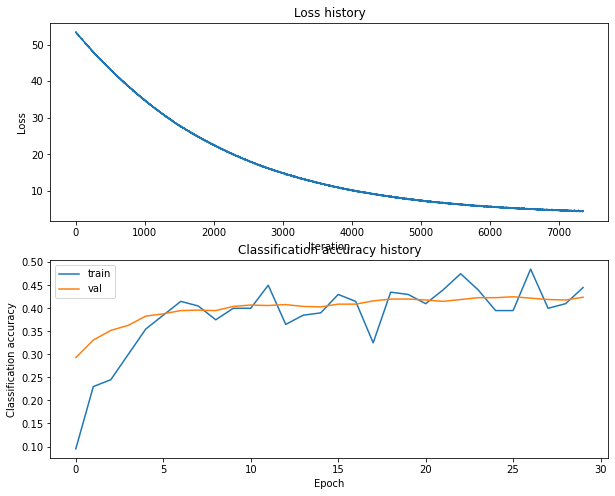

In [28]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss_adam)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy_adam, label='train')
plt.plot(val_accuracy_adam, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

## Hyperparameter tuning

Once you have successfully trained a network you can tune your hyparameters to increase your accuracy.

Based on the graphs of the loss function above you should be able to develop some intuition about what hyperparameter adjustments may be necessary. A very noisy loss implies that the learning rate might be too high, while a linearly decreasing loss would suggest that the learning rate may be too low. A large gap between training and validation accuracy would suggest overfitting due to large model without much regularization. No gap between training and validation accuracy would indicate low model capacity. 

You will compare networks of two and three layers using the different optimization methods you implemented. 

The different hyperparameters you can experiment with are:
- **Batch size**: We recommend you leave this at 200 initially which is the batch size we used. 
- **Number of iterations**: You can gain an intuition for how many iterations to run by checking when the validation accuracy plateaus in your train/val accuracy graph.
- **Initialization** Weight initialization is very important for neural networks. We used the initialization `W = np.random.randn(n) / sqrt(n)` where `n` is the input dimension for layer corresponding to `W`. We recommend you stick with the given initializations, but you may explore modifying these. Typical initialization practices: http://cs231n.github.io/neural-networks-2/#init
- **Learning rate**: Generally from around 1e-4 to 1e-1 is a good range to explore according to our implementation.
- **Learning rate decay**: We recommend a 0.95 decay to start.
- **Hidden layer size**: You should explore up to around 120 units per layer. For three-layer network, we fixed the two hidden layers to be the same size when obtaining the target numbers. However, you may experiment with having different size hidden layers.
- **Regularization coefficient**: We recommend trying values in the range 0 to 0.1. 

Hints:
- After getting a sense of the parameters by trying a few values yourself, you will likely want to write a few for-loops to traverse over a set of hyperparameters.
- If you find that your train loss is decreasing, but your train and val accuracy start to decrease rather than increase, your model likely started minimizing the regularization term. To prevent this you will need to decrease the regularization coefficient. 

## Run on the test set
When you are done experimenting, you should evaluate your final trained networks on the test set.

Test Accuracy Using SGD

In [29]:
matrix_test = net.forward(X_test)
y_pred_test = np.argmax(matrix_test, axis=1)
test_acc = (y_pred_test == y_test).mean()
print(test_acc)

0.4001


Test Accuracy Using Adam

In [30]:
matrix_test_adam = net_adam.forward(X_test)
y_pred_test_adam = np.argmax(matrix_test_adam, axis=1)
test_acc_adam = (y_pred_test_adam == y_test).mean()
print(test_acc_adam)

0.4171


In [ ]:
best_2layer_sgd_prediction = 0.4001
best_3layer_sgd_prediction = None
best_2layer_adam_prediction = 0.4171
best_3layer_adam_prediction = None

## Compare SGD and Adam
Create graphs to compare training loss and validation accuracy between SGD and Adam. The code is similar to the above code, but instead of comparing train and validation, we are comparing SGD and Adam.

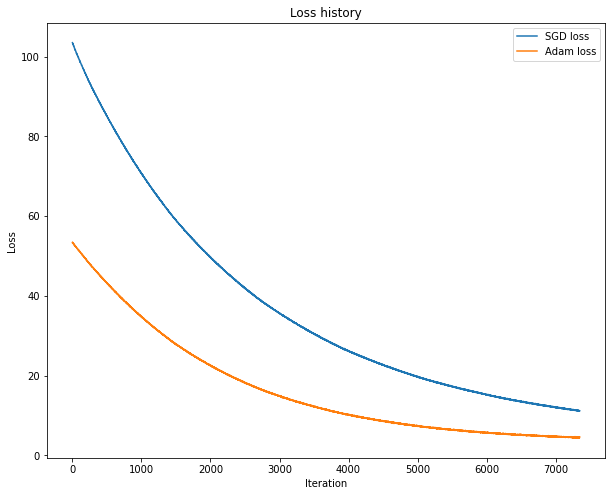

In [31]:
# TODO: implement me
plt.plot(train_loss, label="SGD loss") 
plt.plot (train_loss_adam, label = "Adam loss")
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

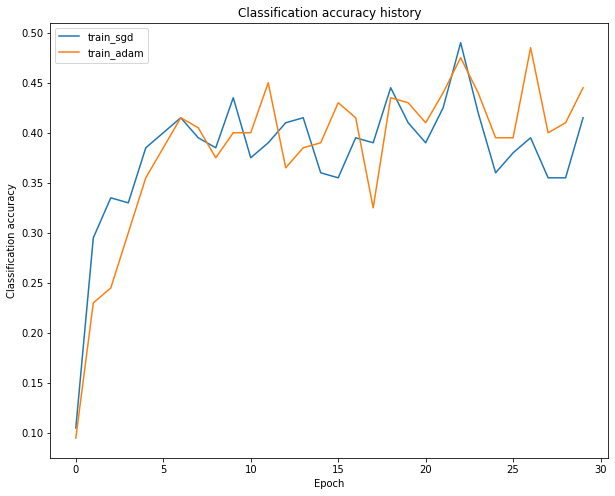

In [32]:
plt.plot(train_accuracy, label='train_sgd')
plt.plot(train_accuracy_adam, label='train_adam')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

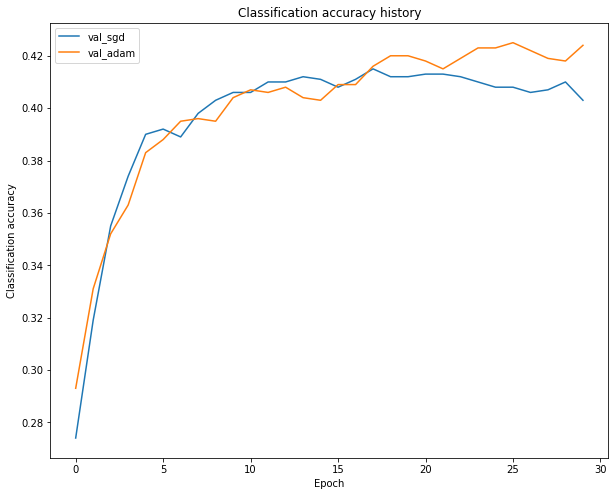

In [33]:
plt.plot(val_accuracy, label='val_sgd')
plt.plot(val_accuracy_adam, label='val_adam')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()